# Sifaka PSMC HEAT GRAPH

## Read Data from Source

In [2]:
%matplotlib inline
from __future__ import print_function
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm

In [3]:
def load_data():
    x = []
    y = []
    with open('data_set.txt') as input_handle:
        for line in input_handle:
            split_line = line.split('\t')
            x_val = float(split_line[0])
            if x_val != 0:
                x_val = math.log(x_val)
                y_val = float(split_line[1]) * (10 ** 4) * 100 # scaling factor
                x.append(x_val)
                y.append(y_val)
    return np.array(x), np.array(y)

## Get X and Y Min and Max

In [4]:
x, y = load_data()
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
print(xmin, ymin, xmax, ymax)

9.57201158832 3711561.89104 16.5327088563 19149736.7405


## Kernel Density

In [5]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

## Plot 

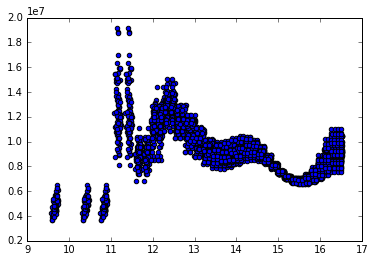

In [6]:
fig, ax = plt.subplots()
# ax.imshow(np.rot90(Z), #DOESN'T WORK
#           extent=[xmin, xmax, ymin, ymax])
ax.scatter(x, y)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
plt.show()

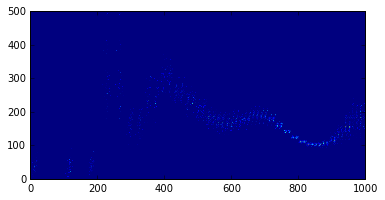

In [7]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(1000, 500))
# extent = [xmin, xmax, ymin, ymax]
plt.clf()
plt.imshow(heatmap.T, origin='lower')
plt.show()

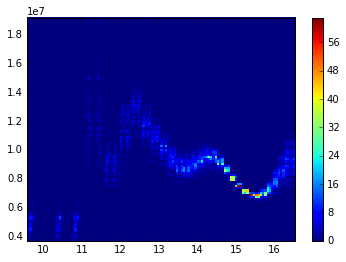

In [8]:
scaler = 1.1904761904761905
x_value = 100
y_scale = x_value * scaler
plt.hist2d(x, y, bins=(y_scale, x_value)) #, norm=LogNorm())
plt.colorbar()
plt.show()